In [42]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [43]:
# Load the data
df = pd.read_csv('credit.csv')

In [44]:
#get num of columns and rows
df.shape

(2000, 6)

In [45]:
#print first 5 rows
df.head()

,clientid,income,age,loan,LTI,creditworthy
0,1,66155.92510,59.017015,8106.532131,0.122537,0
1,2,34415.15397,48.117153,6564.745018,0.190752,0
2,3,57317.17006,63.108049,8020.953296,0.139940,0
3,4,42709.53420,45.751972,6103.642260,0.142911,0
4,5,66952.68885,18.584336,8770.099235,0.130990,1


In [46]:
#print last 5 rows
df.tail()

,clientid,income,age,loan,LTI,creditworthy
1995,1996,59221.04487,48.518179,1926.729397,0.032535,0
1996,1997,69516.12757,23.162104,3503.176156,0.050394,0
1997,1998,44311.44926,28.017167,5522.786693,0.124636,1
1998,1999,43756.05660,63.971796,1622.722598,0.037086,0
1999,2000,69436.57955,56.152617,7378.833599,0.106267,0


In [47]:
#names of columns
df.columns

Index(['clientid', 'income', 'age', 'loan', 'LTI', 'creditworthy'], dtype='object')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   clientid      2000 non-null   int64  
 1   income        2000 non-null   float64
 2   age           2000 non-null   float64
 3   loan          2000 non-null   float64
 4   LTI           2000 non-null   float64
 5   creditworthy  2000 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 93.9 KB


In [49]:
#print nums of nulls
df.isnull().sum()

clientid        0
income          0
age             0
loan            0
LTI             0
creditworthy    0
dtype: int64

In [50]:
# Drop rows with missing values
df.dropna(inplace=True)


In [51]:
#check outliers in columns
columns = ['income', 'age','loan','LTI']

for i in columns:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    norm_range = (q3 - q1) * 1.5

    # Identify lower outliers
    lower_outliers = df[df[i] < (q1 - norm_range)]

    # Identify upper outliers
    upper_outliers = df[df[i] > (q3 + norm_range)]

    # Count the total number of outliers
    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

    # Replace outliers with adjusted values
    df[i] = np.where(df[i] < (q1 - norm_range), q1 - norm_range, df[i])
    df[i] = np.where(df[i] > (q3 + norm_range), q3 + norm_range, df[i])

The number of outliers in income: 0
The number of outliers in age: 0
The number of outliers in loan: 5
The number of outliers in LTI: 0


In [52]:
#deal with outliers
columns = ['loan']

for i in columns:
    q1 = np.percentile(df[i], 25)
    q3 = np.percentile(df[i], 75)
    norm_range = (q3 - q1) * 1.5

    # Identify lower outliers
    lower_outliers = df[df[i] < (q1 - norm_range)]

    # Identify upper outliers
    upper_outliers = df[df[i] > (q3 + norm_range)]

    # Count the total number of outliers
    outliers = len(lower_outliers) + len(upper_outliers)

    print(f"The number of outliers in {i}: {outliers}")

The number of outliers in loan: 0


In [53]:
df.head(15)

,clientid,income,age,loan,LTI,creditworthy
0,1,66155.92510,59.017015,8106.532131,0.122537,0
1,2,34415.15397,48.117153,6564.745018,0.190752,0
2,3,57317.17006,63.108049,8020.953296,0.139940,0
3,4,42709.53420,45.751972,6103.642260,0.142911,0
4,5,66952.68885,18.584336,8770.099235,0.130990,1
5,6,24904.06414,57.471607,15.498598,0.000622,0
6,7,48430.35961,26.809132,5722.581981,0.118161,0
7,8,24500.14198,32.897548,2971.003310,0.121265,1
8,9,40654.89254,55.496853,4755.825280,0.116980,0
9,10,25075.87277,39.776378,1409.230371,0.056199,0


In [54]:
#check duplicates
df.duplicated().sum()

0

In [55]:
#drop id column
df = df.drop(columns=['clientid'])


In [56]:
df.head()

,income,age,loan,LTI,creditworthy
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


#Visualization

In [57]:
#making correlation
df.corr()

,income,age,loan,LTI,creditworthy
income,1.000000,-0.034984,0.441055,-0.019862,0.002284
age,-0.034984,1.000000,0.006545,0.021588,-0.444765
loan,0.441055,0.006545,1.000000,0.847633,0.377334
LTI,-0.019862,0.021588,0.847633,1.000000,0.433261
creditworthy,0.002284,-0.444765,0.377334,0.433261,1.000000


<Axes: >

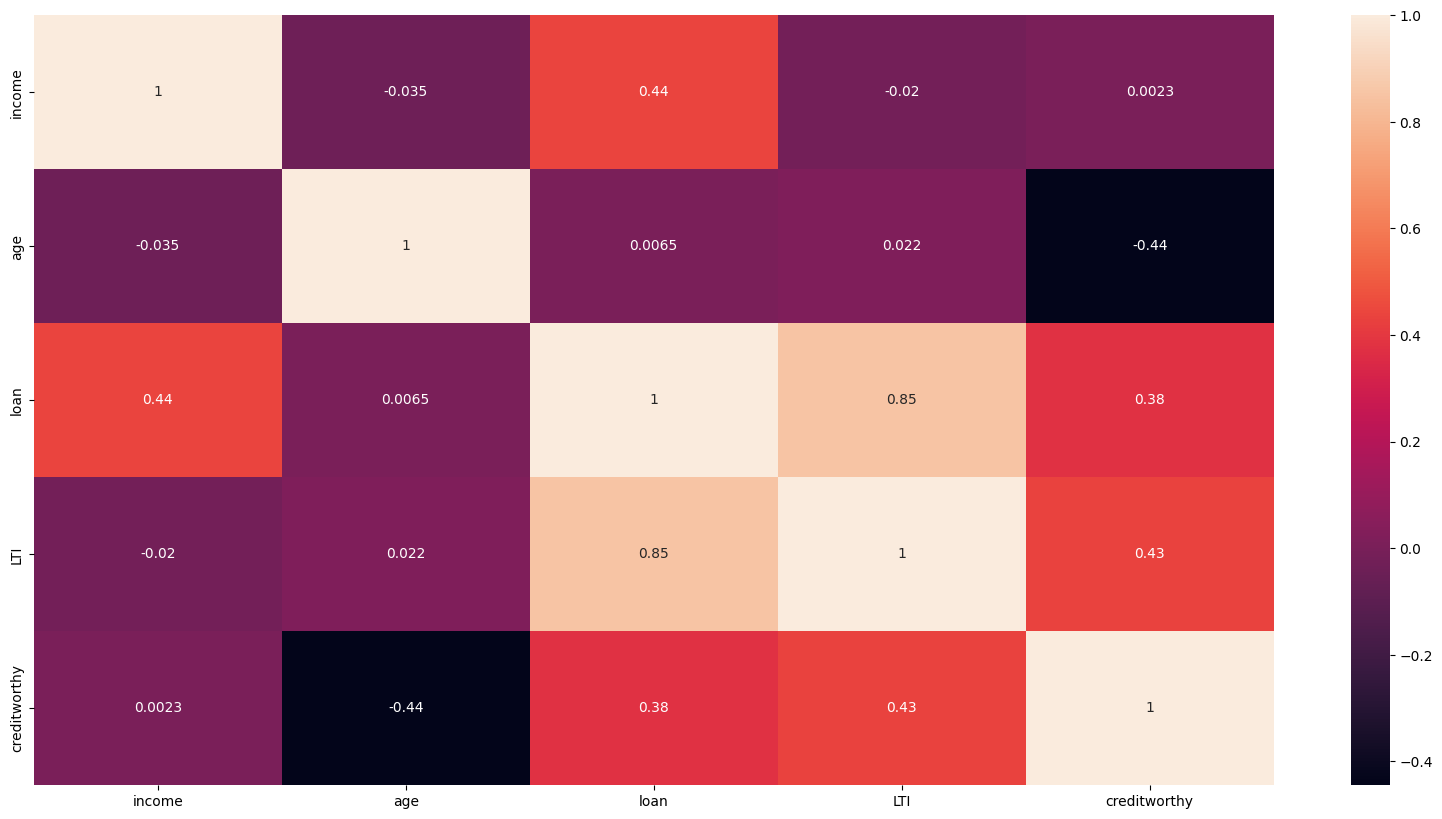

In [58]:
#making correlation on the data
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),annot = True)

In [59]:
#knowing how many columns have high or low or bad correlation
high_corr = []
low_corr = []
bad_corr = []
for col in df.columns:
  relation = df['creditworthy'].corr(df[col])
  if(relation > 0):
    if relation >= 0.7 and relation <= 1 :
      # print(f"relation between {col} & diagnosis is high positive \n {relation}")
      high_corr.append(col)
    elif relation >= 0.4 and relation < 0.7 :
      # print(f"relation between {col} & diagnosis is low positive \n {relation}")
      low_corr.append(col)
    else: bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low positive \n {relation}")
  else:
    if relation <= -0.7 and relation > -1 :
      # print(f"relation between {col} & diagnosis is high negative \n {relation}")
      high_corr.append(col)
    elif relation <= -0.4 and relation > -0.7 :
      # print(f"relation between {col} & diagnosis is low negative \n {relation}")
      low_corr.append(col)
    else: bad_corr.append(col)# print(f"relation between {col} & diagnosis is very low negative \n {relation}")

print(f"the high corr are {high_corr}")
print(f"the low corr are {low_corr}")
print(f"the bad corr are {bad_corr}")

the high corr are ['creditworthy']
the low corr are ['age', 'LTI']
the bad corr are ['income', 'loan']


In [60]:
# Splitting data into features and target variable
X = df.drop('creditworthy', axis=1)
y = df['creditworthy']


In [61]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [63]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [64]:
# Model evaluation
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print("Accuracy:", accuracy_percentage)


Accuracy: 99.75


In [65]:

import matplotlib.pyplot as plt
import seaborn as sns


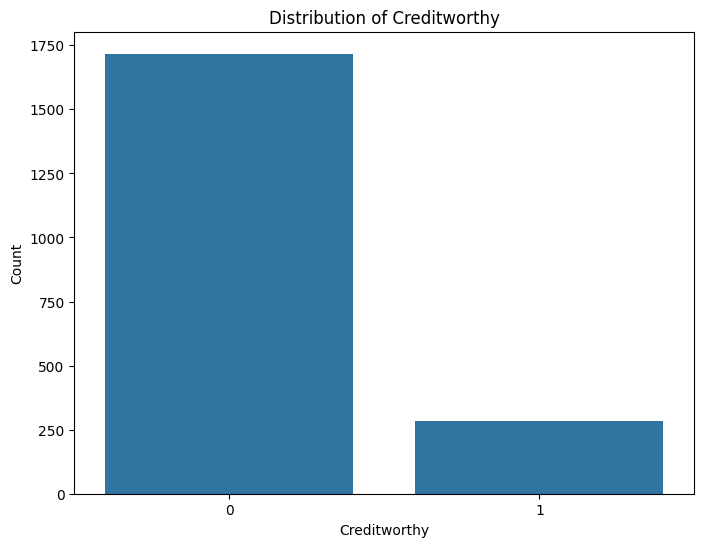

In [66]:

# Visualizing the distribution of the target variable 'creditworthy'
plt.figure(figsize=(8, 6))
sns.countplot(x='creditworthy', data=df)
plt.title('Distribution of Creditworthy')
plt.xlabel('Creditworthy')
plt.ylabel('Count')
plt.show()


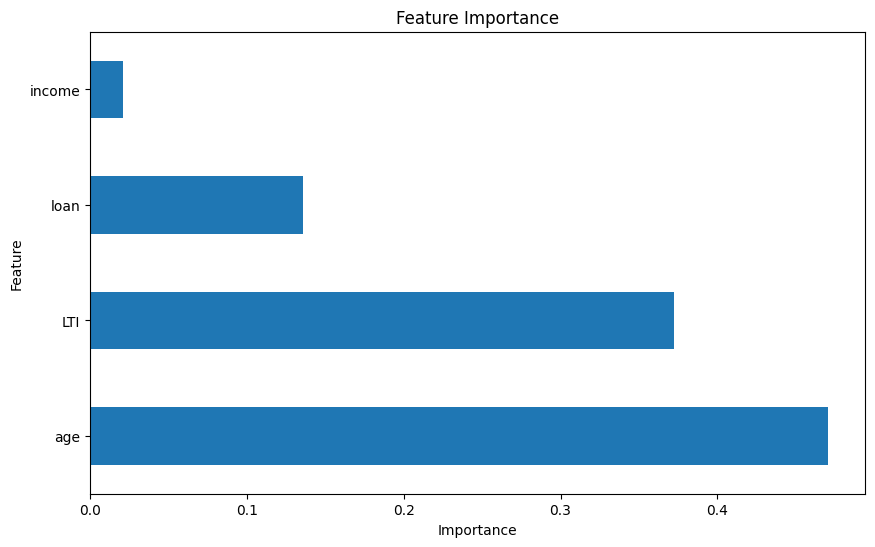

In [67]:
# Visualizing feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


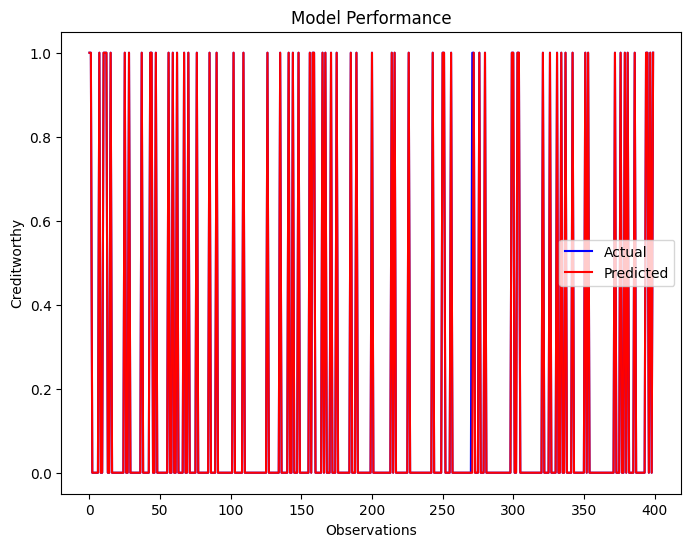

In [68]:
# Visualizing the model's performance
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title('Model Performance')
plt.xlabel('Observations')
plt.ylabel('Creditworthy')
plt.legend()
plt.show()


In [69]:
# show us the dataset
df

# show us the scaled down dataset
X_train_scaled


array([[ 1.02345173,  0.99282886, -0.51059907, -0.86951261],
       [ 0.04742367,  0.93386169,  0.97546253,  1.09257579],
       [-0.35599187, -0.76233006, -1.11968621, -1.26324865],
       ...,
       [-1.25325652, -1.68859268,  0.03221773,  1.17500027],
       [ 1.56496038, -0.91720721,  0.20471656, -0.40630249],
       [-1.35548681, -1.46768383, -0.23938196,  0.78189091]])